In [1]:
# a new document for image compression

# getting a lot of help here from http://bugra.github.io/work/notes/2014-07-12/discre-fourier-cosine-transform-dft-dct-image-compression/

In [3]:
%matplotlib inline
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import IPython

In [38]:
def get_image_from_file(image_filename='kitty.jpg', size=(128, 128)):
    image = Image.open(image_filename)
    img_color = image.resize(size, 1)
    img_grey = img_color.convert('L')
    img = np.array(img_grey, dtype=np.float)
    return np.fliplr(img.T)
 
def get_2D_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

In [47]:
pixels = get_image_from_file(image_filename='kitty.jpg', size=(256, 220))
dct_size = pixels.shape[0]
dct = get_2D_dct(pixels)
reconstructed_images = []

for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    r_img = get_2d_idct(dct_copy);
    reconstructed_image = get_reconstructed_image(r_img);

    # Create a list of images
    reconstructed_images.append(reconstructed_image);

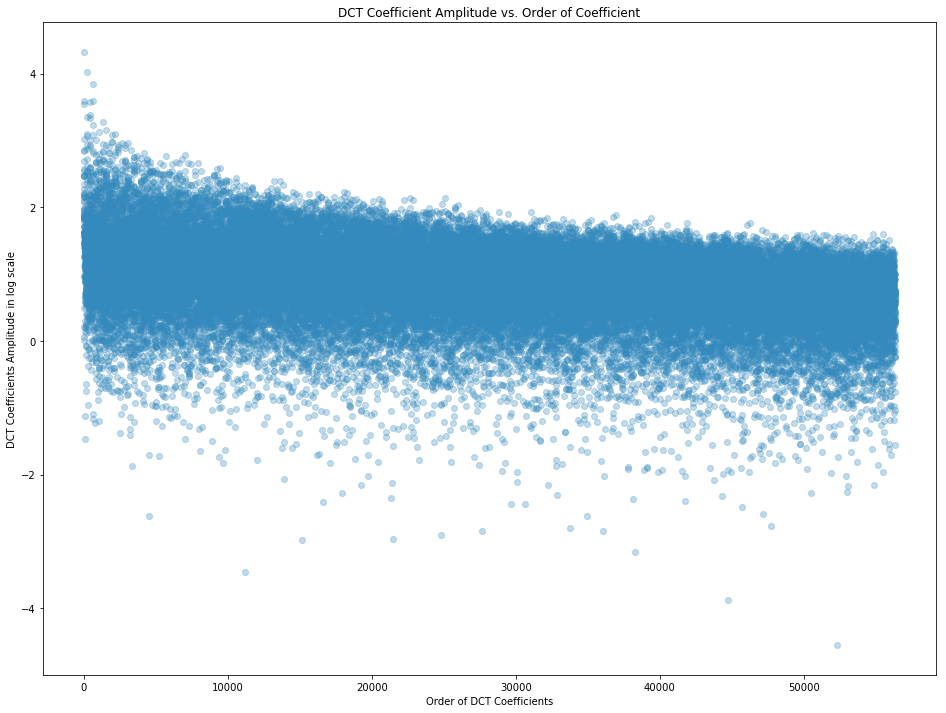

In [48]:
plt.figure(figsize=(16, 12));
plt.scatter(range(dct.ravel().size), np.log10(np.abs(dct.ravel())), c='#348ABD', alpha=.3);
plt.title('DCT Coefficient Amplitude vs. Order of Coefficient');
plt.xlabel('Order of DCT Coefficients');
plt.ylabel('DCT Coefficients Amplitude in log scale');

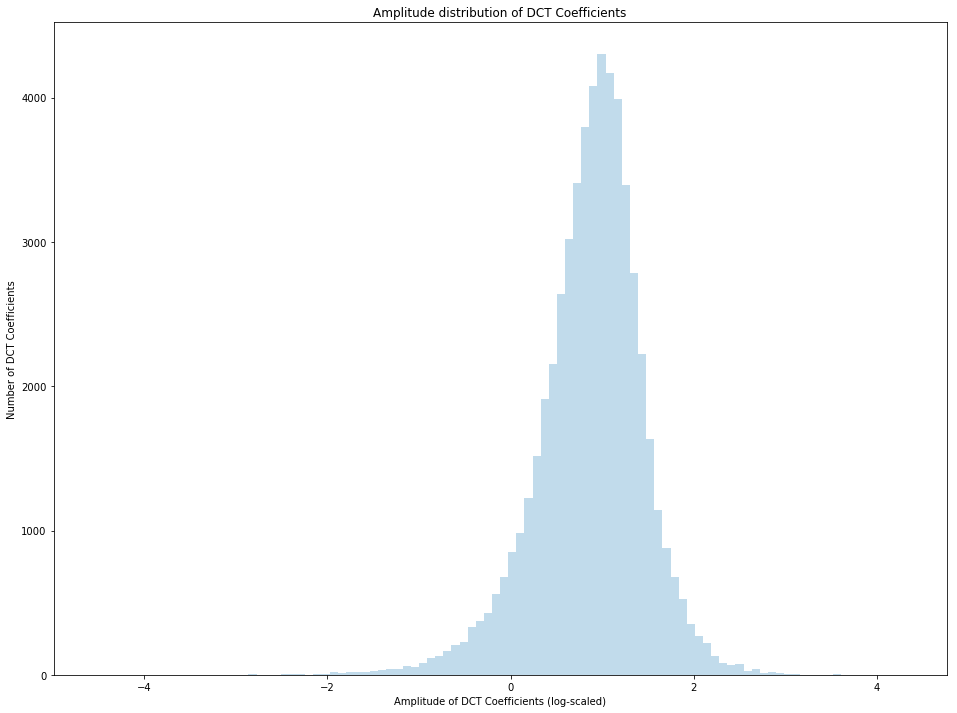

In [49]:
plt.figure(figsize=(16, 12))
plt.hist(np.log10(np.abs(dct.ravel())), bins=100, color='#348ABD', alpha=.3, histtype='stepfilled');
plt.xlabel('Amplitude of DCT Coefficients (log-scaled)');
plt.ylabel('Number of DCT Coefficients');
plt.title('Amplitude distribution of DCT Coefficients');

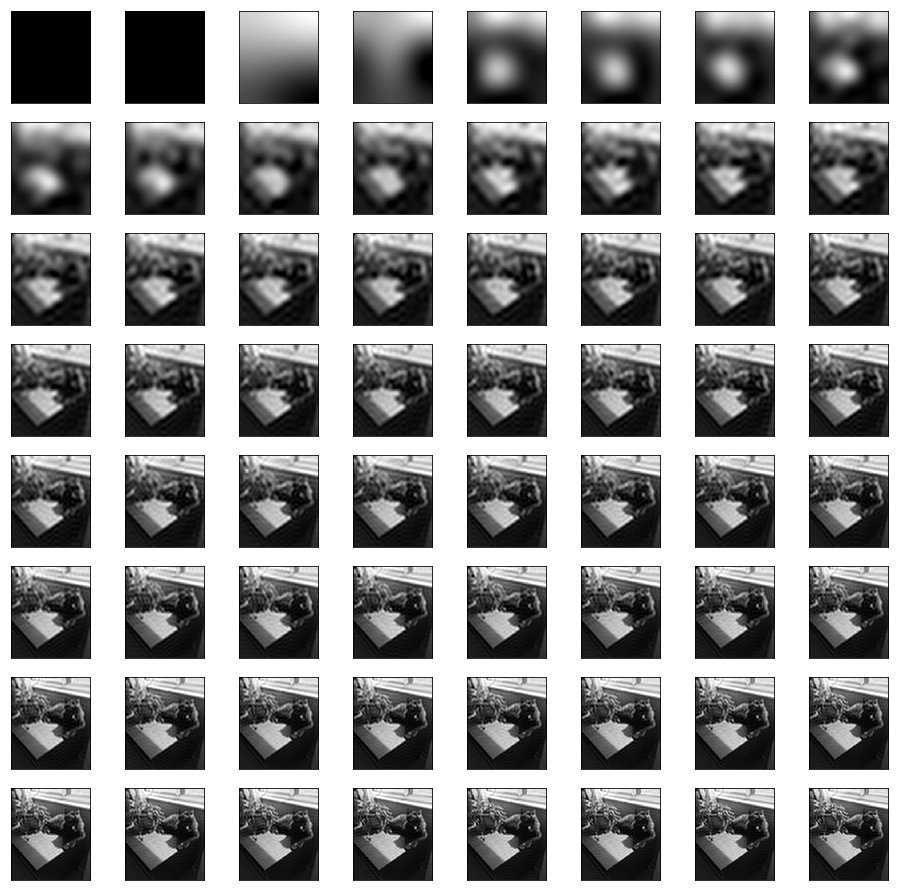

In [50]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

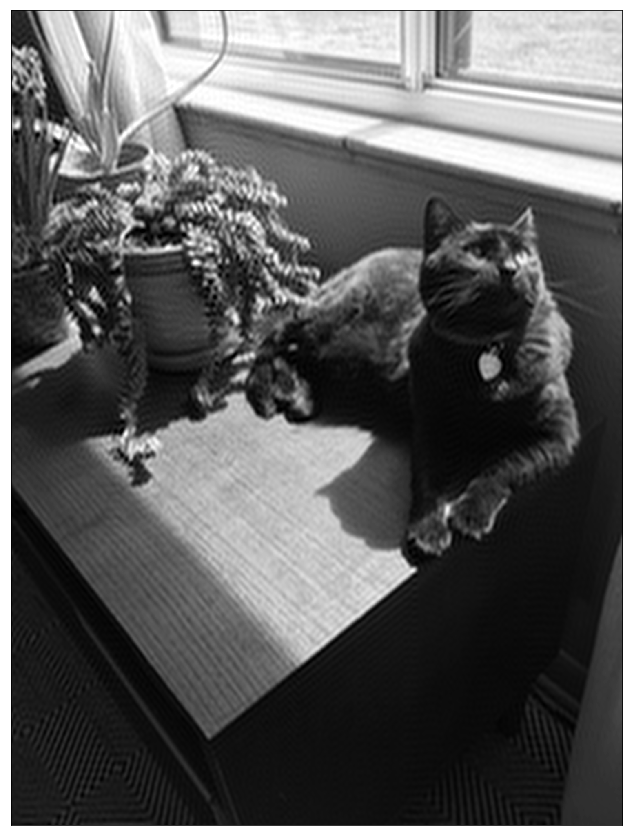

In [71]:
pixels = get_image_from_file(image_filename='kitty.jpg', size=(2000, 1500))
dct_size = pixels.shape[0]
dct = get_2D_dct(pixels)
reconstructed_images = []

lastRowCol = 200

dct_copy = dct.copy()
dct_copy[lastRowCol:,:] = 0
dct_copy[:,lastRowCol:] = 0

# Reconstructed image
r_img = get_2d_idct(dct_copy);
reconstructed_image = get_reconstructed_image(r_img);

plt.figure(figsize=(15,15))
plt.imshow(reconstructed_image, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);